In [ ]:
# データのロード
# 教科書と異なりmath$mathとmath$physに入る
math <- read.csv("./csv/Math&Phys.csv", header = T)

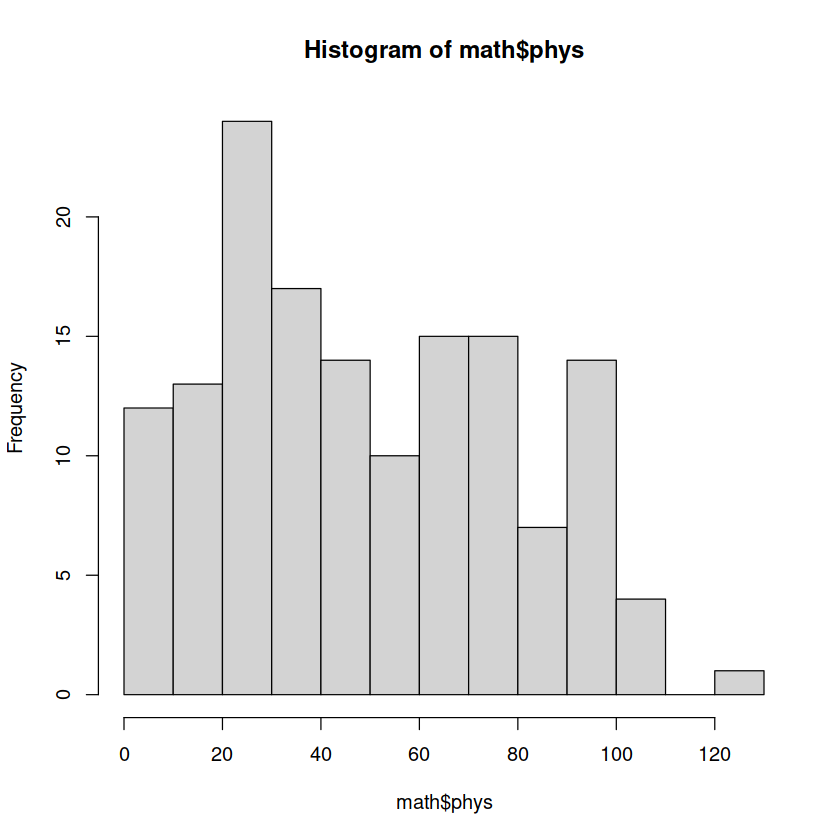

In [ ]:
hist(math$phys)

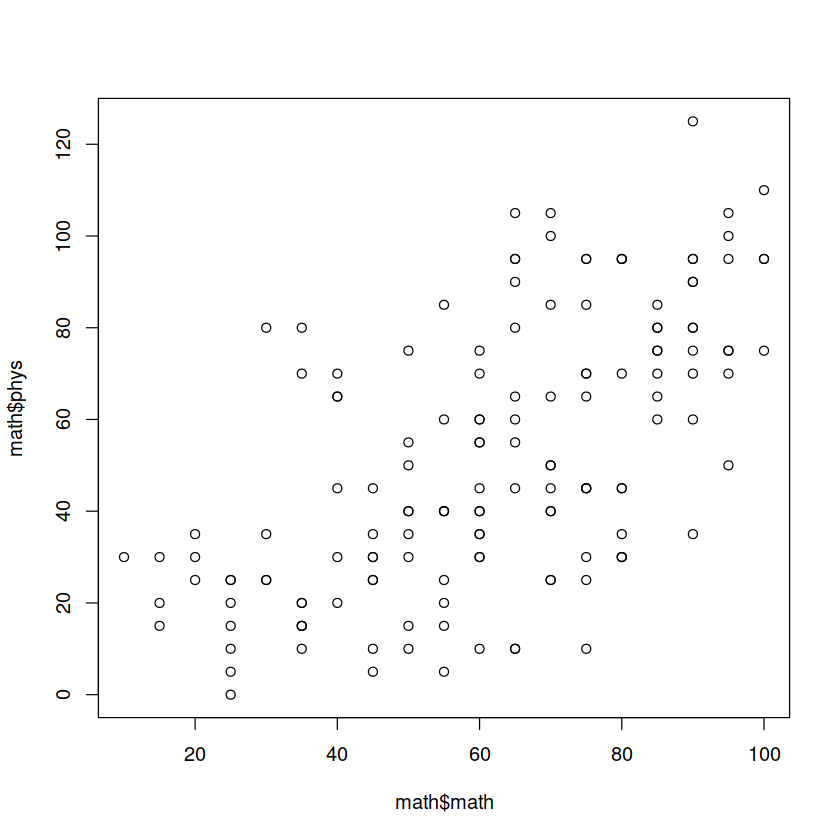

In [ ]:
plot(math$math, math$phys)

In [ ]:
#不偏共分散
cov(math$math, math$phys)

[1] 407.9086

In [ ]:
cor.test(math$math, math$phys)


	Pearson's product-moment correlation

data:  math$math and math$phys
t = 9.4616, df = 144, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5077840 0.7101767
sample estimates:
      cor 
0.6191588 


In [ ]:
#スピアマンの順位相関係数 ケンドールの順位相関係数
cor(math$math, math$phys, method = "spearman")
cor(math$math, math$phys, method = "kendall")

[1] 0.6321976

[1] 0.4670729

In [ ]:
#スピアマンの順位相関係数
cor.test(math$math, math$phys, method = "spearman")

Warning message in cor.test.default(math$math, math$phys, method = "spearman"):
“ タイのため正確な p 値を計算することができません ”



	Spearman's rank correlation rho

data:  math$math and math$phys
S = 190766, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6321976 


In [ ]:
# ケンドールの順位相関係数
cor.test(math$math, math$phys, method = "kendall")


	Kendall's rank correlation tau

data:  math$math and math$phys
z = 7.9598, p-value = 1.724e-15
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.4670729 


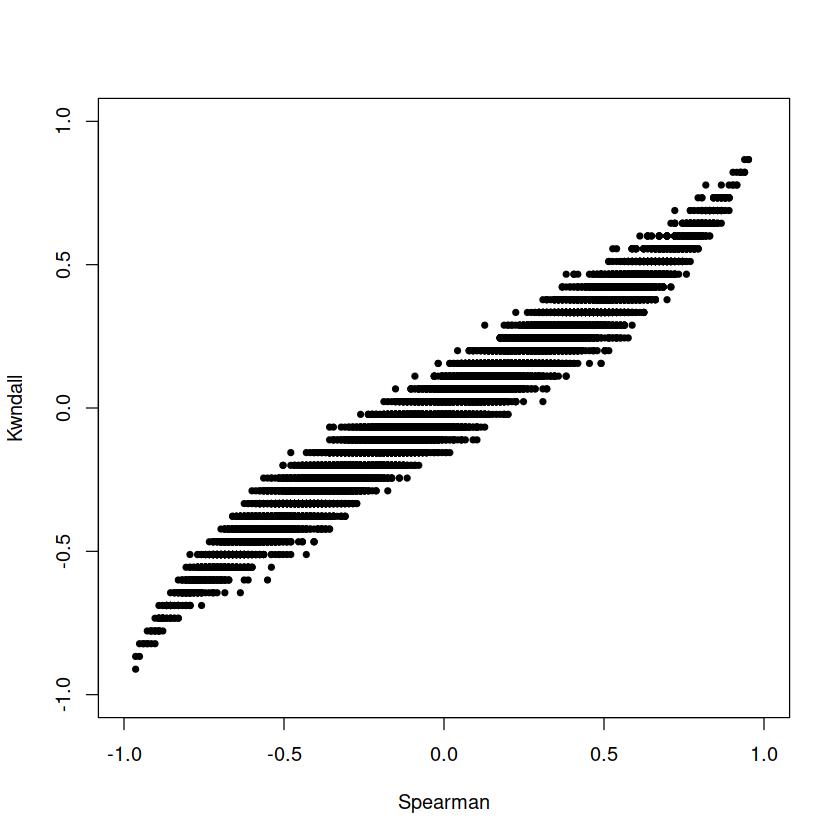

In [ ]:
# スピアマンの順位相関係数とケンドールの相関係数可視化
M <- 10
N<- 200
x <- matrix(runif(M*N,0.1), nrow = M, ncol = N)
y <- matrix(runif(M*N,0.1), nrow = M, ncol = N)
sz <- cor(x,y, method = "spearman")
kz <- cor(x,y, method = "kendall")
plot(sz,kz,xlim=c(-1,1), ylim=c(-1,1),xlab="Spearman",ylab="Kwndall",pch=20)

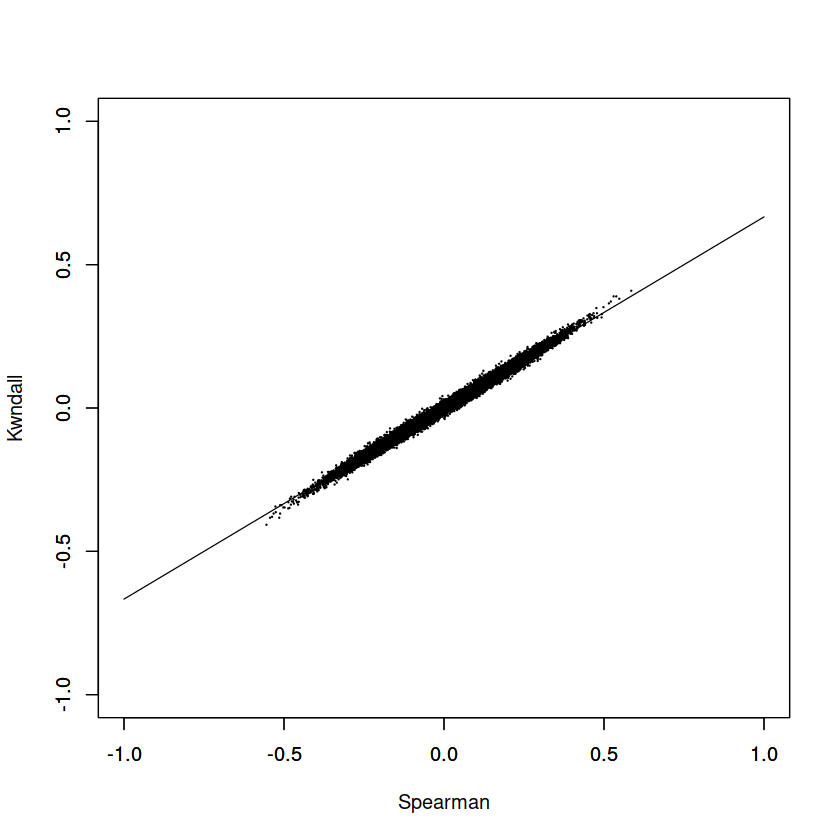

In [ ]:
# スピアマンの順位相関係数とケンドールの相関係数可視化
x <- seq(0,2, by = 0.01)
y <- 2*x-x^2 + rnorm(length(x),0,0.2)
M <- 50
N<- 200
x <- matrix(runif(M*N,0.1), nrow = M, ncol = N)
y <- matrix(runif(M*N,0.1), nrow = M, ncol = N)
sz <- cor(x,y, method = "spearman")
kz <- cor(x,y, method = "kendall")
plot(sz,kz,xlim=c(-1,1), ylim=c(-1,1),xlab="Spearman",ylab="Kwndall",pch=20, cex=0.2)
par(new=TRUE)
curve(2*x/3, xlim=c(-1,1),ylim=c(-1,1),xlab="",ylab="")

[1] -0.864857

[1] -1

[1] -1

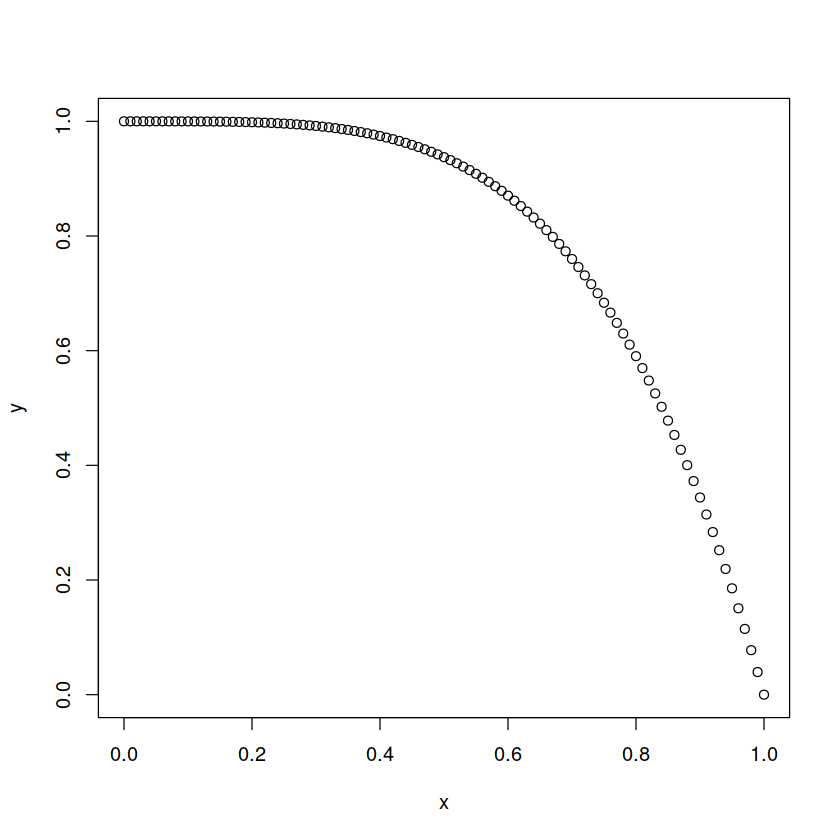

In [ ]:
# 2 - 1
#xを0から1まで0.01の交差でできたデータとし、y = 1- x^4 としてデータyを作る。
#散布図を描きピアソンの積率相関係数、スピアマン、ケンドールの順位相関係数をそれぞれ計算せよ
x <- seq(0,1,by=0.01)
y <- 1 - x^4
plot(x,y)
cor(x,y)
cor(x,y, method = "spearman")
cor(x,y, method = "kendall")

2-2
ピアソンの積率相関係数、順位相関係数は2変量の単位のとり方によらないことを示せ

$$
\begin{align}
r
&= \frac{\sum^n_{j=1}{(c_1x_j - c_1\bar{x})(c_2y_j - c_2\bar{y})}}{\sqrt{\sum_{j=1}^n{(c_1x_j - c_1\bar{x})^2}}\sqrt{\sum_{j=1}^n{(c_2y_j - c_2\bar{y})^2}}} \\
&= \frac{c_1c_2\sum^n_{j=1}{(x_j - \bar{x})(y_j - \bar{y})}}{\sqrt{c_1^2}\sqrt{c_2^2}\sqrt{\sum_{j=1}^n{(x_j - \bar{x})^2}}\sqrt{\sum_{j=1}^n{(y_j - \bar{y})^2}}}\\
&= \frac{c_1c_2\sum^n_{j=1}{(x_j - \bar{x})(y_j - \bar{y})}}{|c_1||c_2|\sqrt{\sum_{j=1}^n{(x_j - \bar{x})^2}}\sqrt{\sum_{j=1}^n{(y_j - \bar{y})^2}}}\\
&= \frac{c_1c_2}{|c_1||c_2|}r_xy
\end{align}
$$
順位相関係数はそもそも絶対的な大きさを見ないのでとり方によらない

2-3
x, y が逆順のときスピアマンの順位相関係数が-1になることを示せ  
スピアマンの順位相関係数は
$$
\rho_{xy} = 1 - \frac{6}{n(n^2 -1)} \sum^n_{j=1}(R^x_j - R^y_j)^2 \\
x, y が逆順なのでR^x_j= jのときR^x_j = n - (j - 1)
したがって\rho_{xy}は\\
\begin{align}
\rho_{xy} &= 1 - \frac{6}{n(n^2 -1)} \sum^n_{j=1}\Bigl[j - \lbrace n - (j -1)\rbrace	\Bigr]^2 \\
&= 1 - \frac{6}{n(n^2 -1)} \sum^n_{j=1}(-n + 2j -1 )^2 \\
&= 1 - \frac{6}{n(n^2 -1)} \sum^n_{j=1}(4j^2 -4j(n+1) + (n+1)^2) \\
&= 1 - \frac{6}{n(n^2 -1)} \lbrace 4\sum^n_{j=1}{j^2} -4(n+1)\sum^n_{j=1}{j} + n(n+1)^2\rbrace\\
&= 1 - \frac{6}{n(n^2 -1)} \lbrace\frac{2}{3}n(n+1)(2n+1) -n(n+1)^2\rbrace\\
&= 1 - \frac{6}{n(n^2 -1)} \lbrace \frac{1}{3}n(n+1)(4n - 2 - 3n -3) \rbrace\\
&= 1 - \frac{6}{n(n^2 -1)} \lbrace \frac{1}{3}n(n+1)(n-1) \rbrace\\
&= 1 -2 \\
&= -1
\end{align}
$$

2 - 4
x,yが逆順であるとき、ケンドールの順位相関係数が-1になりことを示せ

逆順であるとき２つの項目の順位の大小関係は一致しない。
したがってK=0より
$$
\tau_{xy} = \frac{2K}{{}_n C_2} -1= -1
$$

2-5
解けず

In [ ]:
#2-6
x <- seq(-1,1,by=0.01)
y <- x^3 - 3*x + rnorm(length(x),0,01)
cor(x,y)

[1] -0.8197457

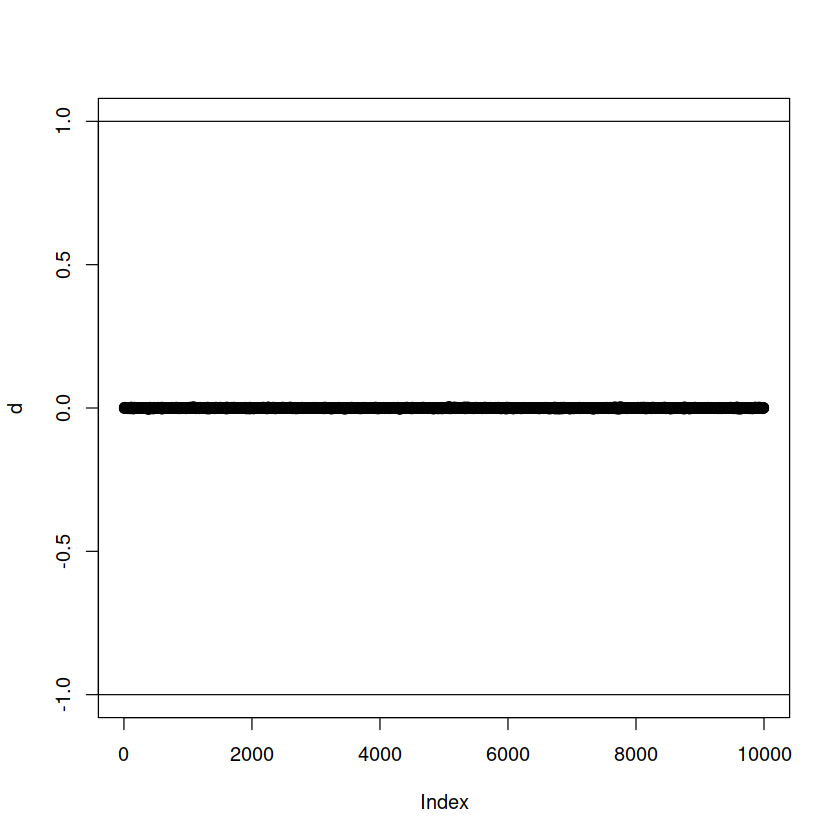


	One Sample t-test

data:  d
t = 0.95431, df = 9999, p-value = 0.34
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -1.419212e-05  4.112081e-05
sample estimates:
   mean of x 
1.346434e-05 


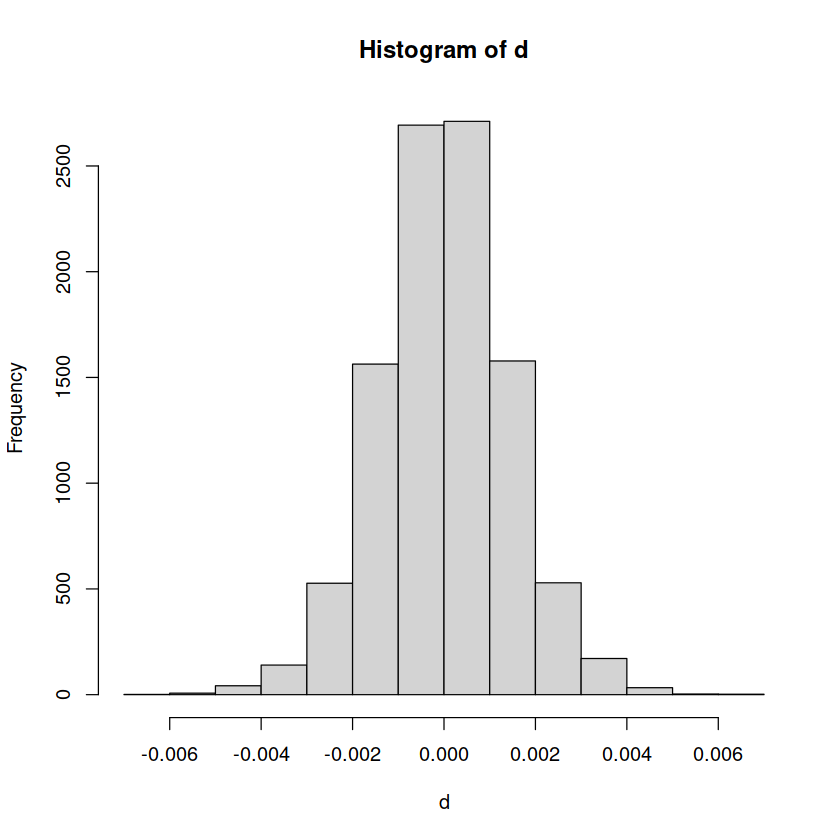

In [ ]:
#2-7 
# スピアマンの順位相関係数ρとケンドールのτの間には次の不等式が成り立つことが知られている。これをシミュレーションして確認せよ
# -1 <- 3τ - 2 ρ≦ 1 
M <- 1000
N <- 10000w2
d <- numeric(N)
for(i in 1:N){
X <- runif(M,min = 0,max = 1)
Y <- runif(M,min = 0,max = 1)
tau <- cor(X,Y, method = "kendall")
rho <- cor(X,Y, method = "spearman")
d[i] <- 3*tau - 2 * rho
}
plot(d,ylim=c(-1.0,1.0))
abline(h=-1)
abline(h=1)
hist(d)
t.test(d)


2 - 9
同じサンプルサイズnを持つx, y に対し、ax + by (a,bは定数)の分散Vが
$$
a^2s_{xx} + b^2s_{yy} + 2abs_{xy}
$$
であることを示せ

$$
分散の式は\\
V = \frac{1}{n}\sum_{j=1}^n(x_j -\bar{x})^2である\\
したがって\\
$$
$$
\begin{align}
V &= \frac{1}{n} \sum_{j=1}^n(ax_j + by_j -(a\bar{x} + b\bar{y}))^2 \\
&= \frac{1}{n} \sum_{j=1}^n(a^2(x_j - \bar{x})^2+ 2ab(x_j - \bar{x})(y_j - \bar{y})+ b^2(y_j - \bar{y})^2) \\
&= a^2s_{xx} + 2abs_{xy} + b^2s_{yy}
\end{align}
$$

　2-8　散布図行列の体格成分には散布図描かれていないがなぜか？

同じ値をプロットしても祖運係数が1の直線しか出ないため